[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


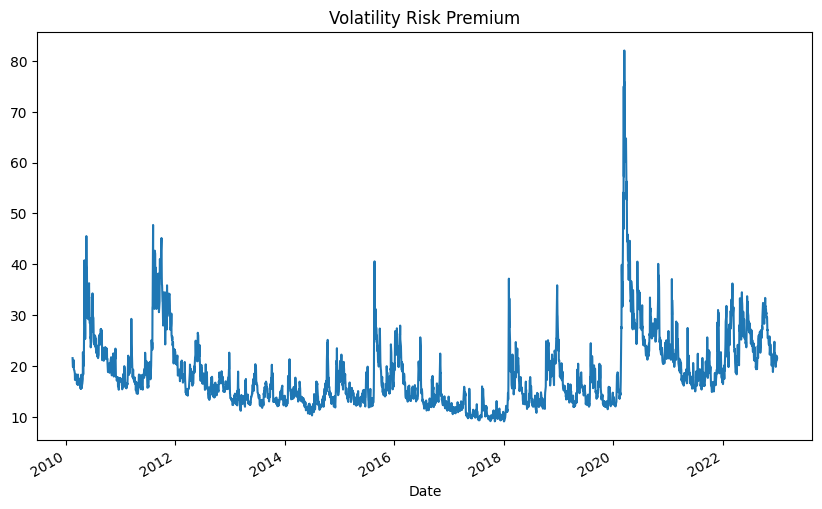

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

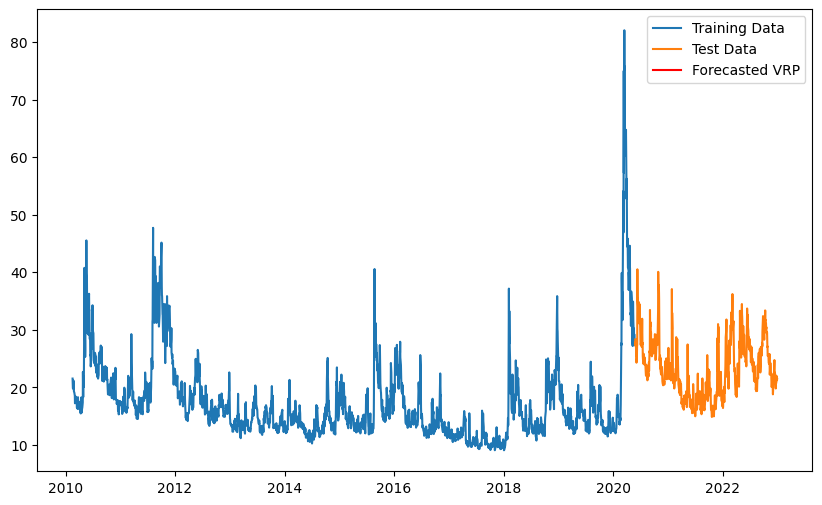

ValueError: NaN or inf values found in y. y must contains only finite values.

In [3]:
import pandas as pd
import numpy as np
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 1. Data Collection
asset_ticker = "^GSPC"
start_date = "2010-01-01"
end_date = "2023-01-01"

# Download historical data
data = yf.download(asset_ticker, start=start_date, end=end_date)

# Calculate daily returns
data['Returns'] = data['Adj Close'].pct_change().dropna()

# Obtain the implied volatility data (VIX for S&P 500)
vix_data = yf.download("^VIX", start=start_date, end=end_date)

# Align the dates
data = data.join(vix_data['Adj Close'], rsuffix='_VIX')
data.dropna(inplace=True)

# 2. Calculate Realized Volatility and VRP
data['Realized Volatility'] = data['Returns'].rolling(window=30).std() * np.sqrt(252)
data['VRP'] = data['Adj Close_VIX'] - data['Realized Volatility']

# Plot VRP
plt.figure(figsize=(10, 6))
data['VRP'].plot(title="Volatility Risk Premium")
plt.show()

# 3. Time Series Forecasting (ARIMA Model)
train_size = int(len(data) * 0.8)
train, test = data['VRP'].iloc[:train_size], data['VRP'].iloc[train_size:]

# Fit ARIMA model on the training data
arima_model = ARIMA(train, order=(1, 1, 1))
arima_result = arima_model.fit()

# Forecast using the ARIMA model
forecast = arima_result.forecast(steps=len(test))
test_forecast = pd.Series(forecast, index=test.index)

# Plot the actual vs forecasted VRP
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label="Training Data")
plt.plot(test.index, test, label="Test Data")
plt.plot(test.index, test_forecast, label="Forecasted VRP", color='red')
plt.legend()
plt.show()

# 4. GARCH Modeling
garch_model = arch_model(train, vol='Garch', p=1, q=1)
garch_result = garch_model.fit(disp='off')

# Forecast using the GARCH model
garch_forecast = garch_result.forecast(horizon=len(test))
vol_forecast = np.sqrt(garch_forecast.variance.values[-1, :])

# Plot the GARCH volatility forecast
plt.figure(figsize=(10, 6))
plt.plot(test.index, vol_forecast, label="Forecasted Volatility")
plt.plot(test.index, test, label="Actual VRP")
plt.legend()
plt.show()

# 5. Model Evaluation and Comparison
arima_rmse = np.sqrt(mean_squared_error(test, test_forecast))
garch_rmse = np.sqrt(mean_squared_error(test, vol_forecast))

print(f"ARIMA RMSE: {arima_rmse}")
print(f"GARCH RMSE: {garch_rmse}")


In [2]:
!pip install arch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 983.4/983.4 kB 9.1 MB/s eta 0:00:00


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


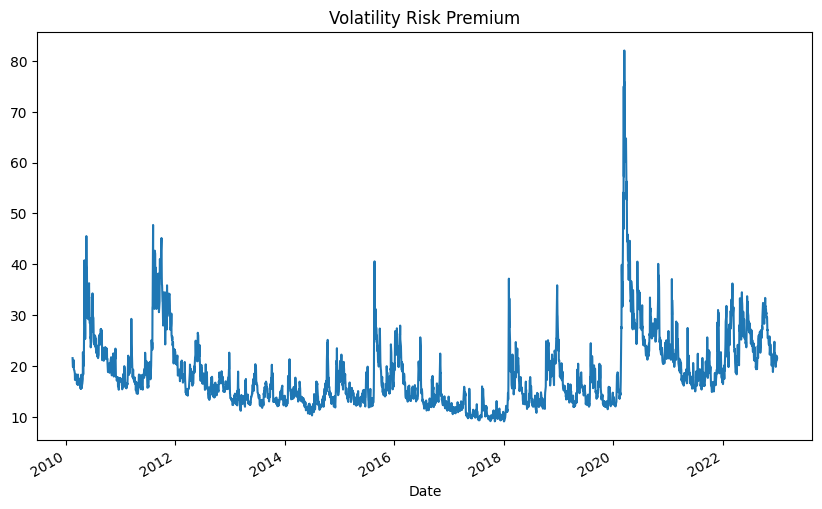

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

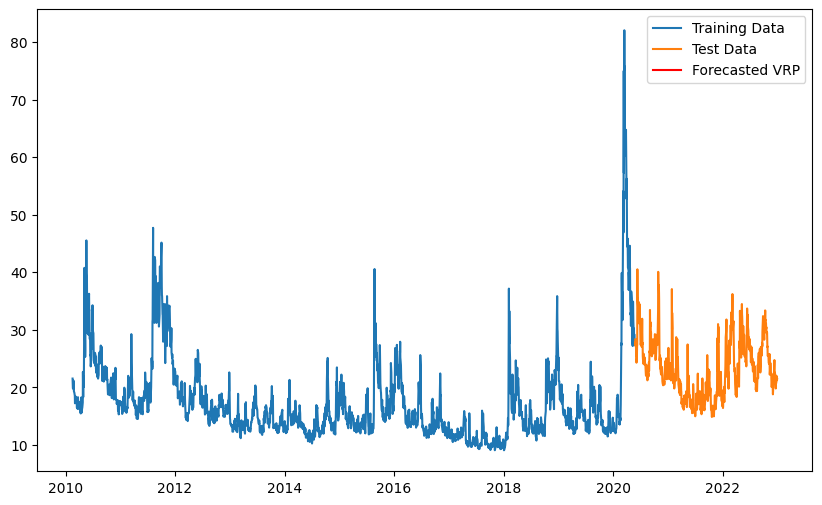

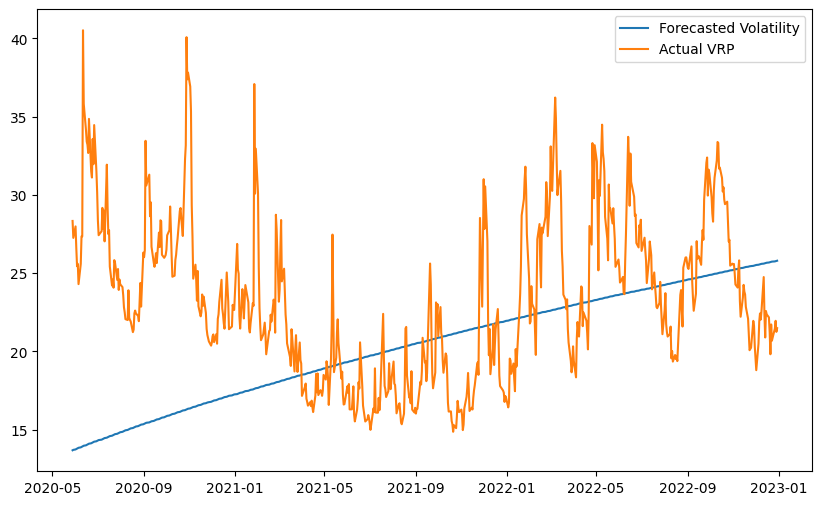

ValueError: Found input variables with inconsistent numbers of samples: [655, 0]

In [5]:
import pandas as pd
import numpy as np
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# 1. Data Collection
asset_ticker = "^GSPC"
start_date = "2010-01-01"
end_date = "2023-01-01"

# Download historical data
data = yf.download(asset_ticker, start=start_date, end=end_date)

# Calculate daily returns
data['Returns'] = data['Adj Close'].pct_change().dropna()

# Obtain the implied volatility data (VIX for S&P 500)
vix_data = yf.download("^VIX", start=start_date, end=end_date)

# Align the dates
data = data.join(vix_data['Adj Close'], rsuffix='_VIX')
data.dropna(inplace=True)

# 2. Calculate Realized Volatility and VRP
data['Realized Volatility'] = data['Returns'].rolling(window=30).std() * np.sqrt(252)
data['VRP'] = data['Adj Close_VIX'] - data['Realized Volatility']

# Plot VRP
plt.figure(figsize=(10, 6))
data['VRP'].plot(title="Volatility Risk Premium")
plt.show()

# 3. Time Series Forecasting (ARIMA Model)
train_size = int(len(data) * 0.8)
train, test = data['VRP'].iloc[:train_size], data['VRP'].iloc[train_size:]

# Fit ARIMA model on the training data
arima_model = ARIMA(train, order=(1, 1, 1))
arima_result = arima_model.fit()

# Forecast using the ARIMA model
forecast = arima_result.forecast(steps=len(test))
test_forecast = pd.Series(forecast, index=test.index)

# Plot the actual vs forecasted VRP
plt.figure(figsize=(10, 6))
plt.plot(train.index, train, label="Training Data")
plt.plot(test.index, test, label="Test Data")
plt.plot(test.index, test_forecast, label="Forecasted VRP", color='red')
plt.legend()
plt.show()

# 4. GARCH Modeling
# Check for and handle NaN/Inf values in the training data
train_cleaned = train.replace([np.inf, -np.inf], np.nan).dropna()  # Replace infinite values with NaN and drop them

garch_model = arch_model(train_cleaned, vol='Garch', p=1, q=1)  # Use the cleaned data for GARCH modeling
garch_result = garch_model.fit(disp='off')

# Forecast using the GARCH model
garch_forecast = garch_result.forecast(horizon=len(test))
vol_forecast = np.sqrt(garch_forecast.variance.values[-1, :])

# Plot the GARCH volatility forecast
plt.figure(figsize=(10, 6))
plt.plot(test.index, vol_forecast, label="Forecasted Volatility")
plt.plot(test.index, test, label="Actual VRP")
plt.legend()
plt.show()

# 5. Model Evaluation and Comparison
# 5. Model Evaluation and Comparison
# Drop NaN values before calculating RMSE
arima_rmse = np.sqrt(mean_squared_error(test.dropna(), test_forecast.dropna()))
garch_rmse = np.sqrt(mean_squared_error(test.dropna(), vol_forecast)) # vol_forecast likely doesn't have NaNs, but good practice to check

print(f"ARIMA RMSE: {arima_rmse}")
print(f"GARCH RMSE: {garch_rmse}")

In [7]:
import pandas as pd
import numpy as np
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Data Collection
asset_ticker = "^GSPC"
start_date = "2010-01-01"
end_date = "2023-01-01"
data = yf.download(asset_ticker, start=start_date, end=end_date)
data['Returns'] = data['Adj Close'].pct_change().dropna()
vix_data = yf.download("^VIX", start=start_date, end=end_date)
data = data.join(vix_data['Adj Close'], rsuffix='_VIX')
data.dropna(inplace=True)

# Realized Volatility Methods
data['RV_StdDev'] = data['Returns'].rolling(window=30).std() * np.sqrt(252)
data['RV_Parkinson'] = (1 / (4 * np.log(2)) * (np.log(data['High'] / data['Low']) ** 2)).rolling(window=30).mean() * np.sqrt(252)
data['RV_GarmanKlass'] = (0.5 * np.log(data['High'] / data['Low']) ** 2 - (2 * np.log(2) - 1) * np.log(data['Close'] / data['Open']) ** 2).rolling(window=30).mean() * np.sqrt(252)
data['RV_RogersSatchell'] = (np.log(data['High'] / data['Open']) * np.log(data['High'] / data['Close']) + np.log(data['Low'] / data['Open']) * np.log(data['Low'] / data['Close'])).rolling(window=30).mean() * np.sqrt(252)
data['RV_YangZhang'] = (0.5 * (np.log(data['High'] / data['Low']) ** 2) - (2 * np.log(2) - 1) * np.log(data['Close'] / data['Open']) ** 2 + 0.25 * (np.log(data['Open'].shift(-1) / data['Close']) ** 2)).rolling(window=30).mean() * np.sqrt(252)

# Calculate VRP for each method
data['VRP_StdDev'] = data['Adj Close_VIX'] - data['RV_StdDev']
data['VRP_Parkinson'] = data['Adj Close_VIX'] - data['RV_Parkinson']
data['VRP_GarmanKlass'] = data['Adj Close_VIX'] - data['RV_GarmanKlass']
data['VRP_RogersSatchell'] = data['Adj Close_VIX'] - data['RV_RogersSatchell']
data['VRP_YangZhang'] = data['Adj Close_VIX'] - data['RV_YangZhang']

# Split data into training and testing sets
train_size = int(len(data) * 0.8)
methods = ['StdDev', 'Parkinson', 'GarmanKlass', 'RogersSatchell', 'YangZhang']
results = {}

for method in methods:
    train, test = data[f'VRP_{method}'].iloc[:train_size], data[f'VRP_{method}'].iloc[train_size:]

    # Handle NaN/Inf values in the training data
    train_cleaned = train.replace([np.inf, -np.inf], np.nan).dropna()  # Replace infinite values with NaN and drop them

    arima_model = ARIMA(train_cleaned, order=(1, 1, 1)) # Use cleaned data for ARIMA
    arima_result = arima_model.fit()
    forecast = arima_result.forecast(steps=len(test))
    test_forecast = pd.Series(forecast, index=test.index)

    garch_model = arch_model(train_cleaned, vol='Garch', p=1, q=1) # Use cleaned data for GARCH
    garch_result = garch_model.fit(disp='off')
    garch_forecast = garch_result.forecast(horizon=len(test))
    vol_forecast = np.sqrt(garch_forecast.variance.values[-1, :])

    arima_rmse = np.sqrt(mean_squared_error(test, test_forecast))
    garch_rmse = np.sqrt(mean_squared_error(test, vol_forecast))

    results[method] = {'ARIMA_RMSE': arima_rmse, 'GARCH_RMSE': garch_rmse}

    plt.figure(figsize=(10, 6))
    plt.plot(test.index, test, label=f"Actual VRP ({method})")
    plt.plot(test.index, test_forecast, label=f"Forecasted VRP (ARIMA) ({method})", color='red')
    plt.plot(test.index, vol_forecast, label=f"Forecasted Volatility (GARCH) ({method})", color='blue')
    plt.title(f"VRP Forecasting with {method} Method")
    plt.legend()
    plt.show()

# Display results
for method, metrics in results.items():
    print(f"Method: {method}")
    print(f"ARIMA RMSE: {metrics['ARIMA_RMSE']}")
    print(f"GARCH RMSE: {metrics['GARCH_RMSE']}\n")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index 

ValueError: Input contains NaN.

In [11]:
import pandas as pd
import numpy as np
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Data Collection
asset_ticker = "^GSPC"
start_date = "2010-01-01"
end_date = "2023-01-01"
data = yf.download(asset_ticker, start=start_date, end=end_date)
data['Returns'] = data['Adj Close'].pct_change().dropna()
vix_data = yf.download("^VIX", start=start_date, end=end_date)
data = data.join(vix_data['Adj Close'], rsuffix='_VIX')
data.dropna(inplace=True)

# Realized Volatility Methods
data['RV_StdDev'] = data['Returns'].rolling(window=30).std() * np.sqrt(252)
data['RV_Parkinson'] = (1 / (4 * np.log(2)) * (np.log(data['High'] / data['Low']) ** 2)).rolling(window=30).mean() * np.sqrt(252)
data['RV_GarmanKlass'] = (0.5 * np.log(data['High'] / data['Low']) ** 2 - (2 * np.log(2) - 1) * np.log(data['Close'] / data['Open']) ** 2).rolling(window=30).mean() * np.sqrt(252)
data['RV_RogersSatchell'] = (np.log(data['High'] / data['Open']) * np.log(data['High'] / data['Close']) + np.log(data['Low'] / data['Open']) * np.log(data['Low'] / data['Close'])).rolling(window=30).mean() * np.sqrt(252)
data['RV_YangZhang'] = (0.5 * (np.log(data['High'] / data['Low']) ** 2) - (2 * np.log(2) - 1) * np.log(data['Close'] / data['Open']) ** 2 + 0.25 * (np.log(data['Open'].shift(-1) / data['Close']) ** 2)).rolling(window=30).mean() * np.sqrt(252)

# Ensure no NaN or inf values in calculated RV columns
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Calculate VRP for each method
data['VRP_StdDev'] = data['Adj Close_VIX'] - data['RV_StdDev']
data['VRP_Parkinson'] = data['Adj Close_VIX'] - data['RV_Parkinson']
data['VRP_GarmanKlass'] = data['Adj Close_VIX'] - data['RV_GarmanKlass']
data['VRP_RogersSatchell'] = data['Adj Close_VIX'] - data['RV_RogersSatchell']
data['VRP_YangZhang'] = data['Adj Close_VIX'] - data['RV_YangZhang']

# Ensure no NaN or inf values in VRP columns
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(subset=[f'VRP_{method}' for method in ['StdDev', 'Parkinson', 'GarmanKlass', 'RogersSatchell', 'YangZhang']], inplace=True)

# Split data into training and testing sets
train_size = int(len(data) * 0.8)
methods = ['StdDev', 'Parkinson', 'GarmanKlass', 'RogersSatchell', 'YangZhang']
results = {}

for method in methods:
    train, test = data[f'VRP_{method}'].iloc[:train_size], data[f'VRP_{method}'].iloc[train_size:]

    # Handle NaN/Inf values in the training data *and* fill NaNs
    train_cleaned = train.replace([np.inf, -np.inf], np.nan).fillna(method='ffill')  # Replace infinite values with NaN and forward fill

    arima_model = ARIMA(train_cleaned, order=(1, 1, 1)) # Use cleaned data for ARIMA
    arima_result = arima_model.fit()
    forecast = arima_result.forecast(steps=len(test))
    test_forecast = pd.Series(forecast, index=test.index)


    garch_model = arch_model(train, vol='Garch', p=1, q=1)
    garch_result = garch_model.fit(disp='off')
    garch_forecast = garch_result.forecast(horizon=len(test))
    vol_forecast = np.sqrt(garch_forecast.variance.values[-1, :])

    arima_rmse = np.sqrt(mean_squared_error(test.dropna(), test_forecast.dropna()))  # Drop NaN in both test and test_forecast
    garch_rmse = np.sqrt(mean_squared_error(test.dropna(), vol_forecast)) # vol_forecast likely doesn't have NaNs, but good practice to check to check

    results[method] = {'ARIMA_RMSE': arima_rmse, 'GARCH_RMSE': garch_rmse}

    plt.figure(figsize=(10, 6))
    plt.plot(test.index, test, label=f"Actual VRP ({method})")
    plt.plot(test.index, test_forecast, label=f"Forecasted VRP (ARIMA) ({method})", color='red')
    plt.plot(test.index, vol_forecast, label=f"Forecasted Volatility (GARCH) ({method})", color='blue')
    plt.title(f"VRP Forecasting with {method} Method")
    plt.legend()
    plt.show()

# Display results
for method, metrics in results.items():
    print(f"Method: {method}")
    print(f"ARIMA RMSE: {metrics['ARIMA_RMSE']}")
    print(f"GARCH RMSE: {metrics['GARCH_RMSE']}\n")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
<ipython-input-11-dbcbab9063f1>:50: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_cleaned = train.replace([np.inf, -np.inf], np.nan).fillna(method='ffill')  # Replace infinite values with NaN and forward fill
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/ba

ValueError: Found input variables with inconsistent numbers of samples: [649, 0]

In [10]:
import pandas as pd
import numpy as np
import yfinance as yf
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Data Collection
asset_ticker = "^GSPC"
start_date = "2010-01-01"
end_date = "2023-01-01"
data = yf.download(asset_ticker, start=start_date, end=end_date)
data['Returns'] = data['Adj Close'].pct_change().dropna()
vix_data = yf.download("^VIX", start=start_date, end=end_date)
data = data.join(vix_data['Adj Close'], rsuffix='_VIX')
data.dropna(inplace=True)

# Realized Volatility Methods
data['RV_StdDev'] = data['Returns'].rolling(window=30).std() * np.sqrt(252)
data['RV_Parkinson'] = (1 / (4 * np.log(2)) * (np.log(data['High'] / data['Low']) ** 2)).rolling(window=30).mean() * np.sqrt(252)
data['RV_GarmanKlass'] = (0.5 * np.log(data['High'] / data['Low']) ** 2 - (2 * np.log(2) - 1) * np.log(data['Close'] / data['Open']) ** 2).rolling(window=30).mean() * np.sqrt(252)
data['RV_RogersSatchell'] = (np.log(data['High'] / data['Open']) * np.log(data['High'] / data['Close']) + np.log(data['Low'] / data['Open']) * np.log(data['Low'] / data['Close'])).rolling(window=30).mean() * np.sqrt(252)
data['RV_YangZhang'] = (0.5 * (np.log(data['High'] / data['Low']) ** 2) - (2 * np.log(2) - 1) * np.log(data['Close'] / data['Open']) ** 2 + 0.25 * (np.log(data['Open'].shift(-1) / data['Close']) ** 2)).rolling(window=30).mean() * np.sqrt(252)

# Ensure no NaN or inf values in calculated RV columns
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(inplace=True)

# Calculate VRP for each method
data['VRP_StdDev'] = data['Adj Close_VIX'] - data['RV_StdDev']
data['VRP_Parkinson'] = data['Adj Close_VIX'] - data['RV_Parkinson']
data['VRP_GarmanKlass'] = data['Adj Close_VIX'] - data['RV_GarmanKlass']
data['VRP_RogersSatchell'] = data['Adj Close_VIX'] - data['RV_RogersSatchell']
data['VRP_YangZhang'] = data['Adj Close_VIX'] - data['RV_YangZhang']

# Re-check for NaN or inf values in VRP columns
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.dropna(subset=[f'VRP_{method}' for method in ['StdDev', 'Parkinson', 'GarmanKlass', 'RogersSatchell', 'YangZhang']], inplace=True)

# Ensure no NaNs before applying the model
methods = ['StdDev', 'Parkinson', 'GarmanKlass', 'RogersSatchell', 'YangZhang']
train_size = int(len(data) * 0.8)
results = {}

for method in methods:
    if data[f'VRP_{method}'].isnull().sum() == 0:
        train, test = data[f'VRP_{method}'].iloc[:train_size], data[f'VRP_{method}'].iloc[train_size:]
        arima_model = ARIMA(train, order=(1, 1, 1))
        arima_result = arima_model.fit()
        forecast = arima_result.forecast(steps=len(test))
        test_forecast = pd.Series(forecast, index=test.index)

        garch_model = arch_model(train, vol='Garch', p=1, q=1)
        garch_result = garch_model.fit(disp='off')
        garch_forecast = garch_result.forecast(horizon=len(test))
        vol_forecast = np.sqrt(garch_forecast.variance.values[-1, :])

        arima_rmse = np.sqrt(mean_squared_error(test, test_forecast))
        garch_rmse = np.sqrt(mean_squared_error(test, vol_forecast))

        results[method] = {'ARIMA_RMSE': arima_rmse, 'GARCH_RMSE': garch_rmse}

        plt.figure(figsize=(10, 6))
        plt.plot(test.index, test, label=f"Actual VRP ({method})")
        plt.plot(test.index, test_forecast, label=f"Forecasted VRP (ARIMA) ({method})", color='red')
        plt.plot(test.index, vol_forecast, label=f"Forecasted Volatility (GARCH) ({method})", color='blue')
        plt.title(f"VRP Forecasting with {method} Method")
        plt.legend()
        plt.show()
    else:
        print(f"Method {method} contains NaNs and was skipped.")

# Display results
for method, metrics in results.items():
    print(f"Method: {method}")
    print(f"ARIMA RMSE: {metrics['ARIMA_RMSE']}")
    print(f"GARCH RMSE: {metrics['GARCH_RMSE']}\n")


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index 

ValueError: Input contains NaN.